# Import Required Libraries 

In [49]:
# import numpy as np
import tensorflow as tf
from nltk.tokenize import RegexpTokenizer
from keras.models import Sequential, load_model
from keras.layers import LSTM, Embedding
from keras.layers import Dense, Activation
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import pickle
import heapq
import warnings
warnings.filterwarnings("ignore")

# Read Data

In [34]:
path = 'C:/Users/Samatha/Downloads/data.txt'
text = open(path, encoding='utf-8').read().lower()
print('corpus length:', len(text))

corpus length: 581887


# Tokenization

In [35]:
tokenizer = RegexpTokenizer(r'\w+')
words = tokenizer.tokenize(text)
words = [word for word in words if "_" not in word]

# Feature Engineering

In [36]:
unique_words = np.unique(words)
unique_word_index = dict((c, i) for i, c in enumerate(unique_words))

In [37]:
WORD_LENGTH = 5
prev_words = []
next_words = []
for i in range(len(words) - WORD_LENGTH):
    prev_words.append(words[i:i + WORD_LENGTH])
    next_words.append(words[i + WORD_LENGTH])
print(prev_words[0])
print(next_words[0])

['project', 'gutenberg', 's', 'the', 'adventures']
of


In [38]:
X = np.zeros((len(prev_words), WORD_LENGTH, len(unique_words)), dtype=bool)
Y = np.zeros((len(next_words), len(unique_words)), dtype=bool)
for i, each_words in enumerate(prev_words):
    for j, each_word in enumerate(each_words):
        X[i, j, unique_word_index[each_word]] = 1
    Y[i, unique_word_index[next_words[i]]] = 1

# Build Model

In [39]:
model = Sequential()
model.add(LSTM(128, input_shape=(WORD_LENGTH, len(unique_words))))
model.add(Dense(len(unique_words)))
model.add(Activation('softmax'))

# Training Model

In [40]:
optimizer = RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(X, Y, validation_split=0.05, batch_size=128, epochs=20, shuffle=True).history

Epoch 1/20
810/810 [==============================] - 187s 226ms/step - loss: 6.6946 - accuracy: 0.0528 - val_loss: 7.2538 - val_accuracy: 0.0539
Epoch 2/20
810/810 [==============================] - 155s 191ms/step - loss: 6.4777 - accuracy: 0.0531 - val_loss: 7.2746 - val_accuracy: 0.0539
Epoch 3/20
810/810 [==============================] - 152s 188ms/step - loss: 6.4370 - accuracy: 0.0533 - val_loss: 7.1997 - val_accuracy: 0.0539
Epoch 4/20
810/810 [==============================] - 153s 189ms/step - loss: 6.3763 - accuracy: 0.0617 - val_loss: 7.1585 - val_accuracy: 0.0645
Epoch 5/20
810/810 [==============================] - 155s 191ms/step - loss: 6.2904 - accuracy: 0.0707 - val_loss: 7.1035 - val_accuracy: 0.0726
Epoch 6/20
810/810 [==============================] - 150s 185ms/step - loss: 6.2019 - accuracy: 0.0798 - val_loss: 7.0328 - val_accuracy: 0.0751
Epoch 7/20
810/810 [==============================] - 151s 186ms/step - loss: 6.1279 - accuracy: 0.0872 - val_loss: 6.9834 -

In [41]:
model.save('keras_next_word_model.h5')
pickle.dump(history, open("history.p", "wb"))
model = load_model('keras_next_word_model.h5')
history = pickle.load(open("history.p", "rb"))

# Evaluating the Next Word Prediction Model

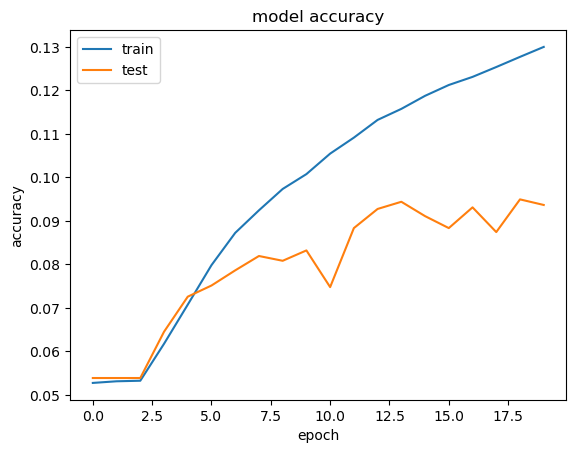

In [42]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

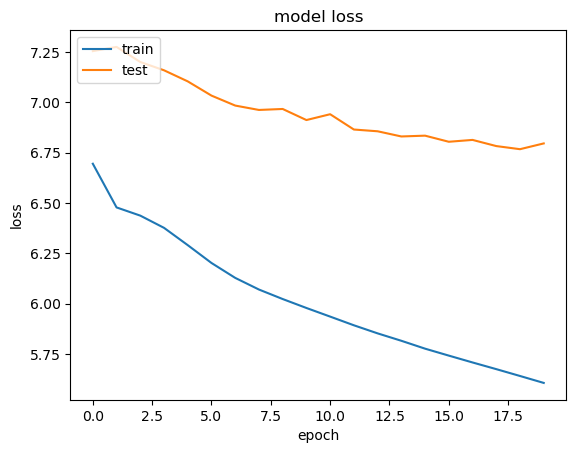

In [43]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left') 

# Test Model

In [44]:
texts = [
    "It is not a lack",
    "That which does not kill",
    "I not upset that you",
    "And those who were seen",
    "It is hard enough to",
    "To Sherlock Holmes she is",
    "They were admirable things for"
]
     

In [45]:
def predict_next_word(input_text, n_best):
    input_text = input_text.lower()
    X = np.zeros((1, WORD_LENGTH, len(unique_words)))
    for i, word in enumerate(input_text.split()):
        X[0, i, unique_word_index[word]] = 1
        
    predictions = model.predict(X)[0]
    return [unique_words[idx] for idx in np.argpartition(predictions, -n_best)[-n_best:]]

In [46]:
possible = predict_next_word("I will have to look", 5)

1/1 [==============================] - 1s 1s/step


In [47]:
possible

['a', 'and', 'that', 'to', 'the']

In [48]:
for text in texts:
    print(predict_next_word(text, 10))

1/1 [==============================] - 0s 38ms/step
['which', 'but', 'i', 'that', 'for', 'man', 'and', 'in', 'to', 'of']
1/1 [==============================] - 0s 32ms/step
['at', 'my', 'for', 'it', 'and', 'the', 'in', 'that', 'a', 'to']
1/1 [==============================] - 0s 34ms/step
['must', 'would', 'may', 'can', 'were', 'could', 'will', 'should', 'are', 'have']
1/1 [==============================] - 0s 33ms/step
['by', 'from', 'with', 'in', 'and', 'a', 'of', 'to', 'the', 'upon']
1/1 [==============================] - 0s 31ms/step
['have', 'him', 'see', 'a', 'you', 'do', 'my', 'be', 'me', 'the']
1/1 [==============================] - 0s 61ms/step
['very', 'at', 'so', 'his', 'not', 'no', 'to', 'a', 'in', 'the']
1/1 [==============================] - 0s 47ms/step
['you', 'some', 'him', 'her', 'it', 'his', 'a', 'me', 'my', 'the']
